In [164]:
from linearmodels import IV2SLS
import pandas as pd
import os
import numpy as np
import matplotlib.dates as mdates
import matplotlib.pyplot as plt

In [165]:
top_down_path = os.getcwd()
os.chdir("../Data")
data_path = os.getcwd()
os.chdir(top_down_path)

# Create dataset for regression analysis

In [171]:
# Read preprocessed
df = pd.read_csv(os.path.join(data_path, "preprocessed.csv"), index_col=0)
df.index = pd.to_datetime(df.index)

In [172]:
df

,aggregated(no_dist_heat),dist_heat,aggregated(incl_small_chp),the_combined_slp,the_combined_rlm,bdew [TWh],electricity_from_gas,gas_price [$/lhs],index,time,year,month,weekday,weekday_num,monday,friday,weekend,christmas_period,holiday,bridgeday
2021-01-01,2.146070,0.110337,2.326920,2.259861,1.721195,3.544281,0.522071,NaN,2021-01-01,0.0,2021,1,Friday,4,0,1,0,0,1,0
2021-01-02,2.120128,0.109003,2.298791,2.295591,1.816520,3.672925,0.570382,NaN,2021-01-02,1.0,2021,1,Saturday,5,0,0,1,0,0,0
2021-01-03,2.156039,0.110849,2.337728,2.328297,1.820381,3.730913,0.378169,NaN,2021-01-03,2.0,2021,1,Sunday,6,0,0,1,0,0,0
2021-01-04,2.255681,0.115972,2.445767,2.390517,2.236697,4.477985,0.686360,19.840,2021-01-04,3.0,2021,1,Monday,0,1,0,0,0,0,0
2021-01-05,2.250272,0.115694,2.439902,2.410678,2.283846,4.672453,0.749740,18.000,2021-01-05,4.0,2021,1,Tuesday,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-03-21,1.340926,0.068942,1.453926,1.392374,1.752227,2.692656,0.501134,96.302,2022-03-21,444.0,2022,3,Monday,0,1,0,0,0,0,0
2022-03-22,1.248650,0.064197,1.353873,1.298474,1.763850,2.834050,0.635613,98.745,2022-03-22,445.0,2022,3,Tuesday,1,0,0,0,0,0,0
2022-03-23,1.164591,0.059876,1.262731,1.192761,1.722181,2.790061,0.656999,117.000,2022-03-23,446.0,2022,3,Wednesday,2,0,0,0,0,0,0
2022-03-24,1.132335,0.058217,1.227757,1.139399,1.723889,2.802156,0.667661,111.610,2022-03-24,447.0,2022,3,Thursday,3,0,0,0,0,0,0


# Disaggregation based on fundamental assumption / energy balances

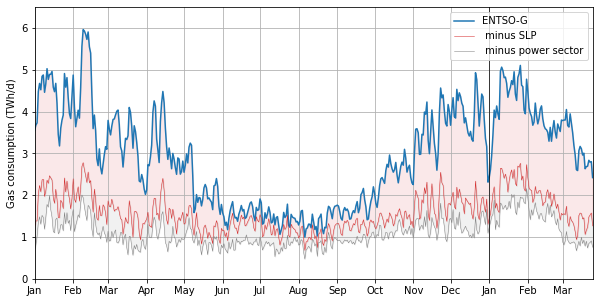

In [173]:
plt.figure(figsize=(10,5))

entso_g = df['bdew [TWh]']
entso_g.plot(label='ENTSO-G')

slp_res = entso_g - df['aggregated(incl_small_chp)']
plt.plot(df.index, slp_res, color='tab:red', label=' minus SLP', linewidth=0.5)
plt.fill_between(df.index, entso_g, slp_res, color='tab:red', alpha=0.1)

power_res = slp_res - df['electricity_from_gas']
plt.plot(df.index, power_res, color='tab:grey', label=' minus power sector', linewidth=0.5)
plt.fill_between(df.index, slp_res, power_res, color='tab:grey', alpha=0.1)

#plt.fill_between(df.index, power_res, 0, color='tab:blue', alpha=0.1)


plt.xlim('2021-01-01', '2022-03-25')
plt.ylim(0, 6.5)
plt.axvline('2022-01-01', color='black', linewidth=0.7)
plt.grid()
plt.legend(loc='upper right')
plt.ylabel('Gas consumption (TWh/d)')

X = plt.gca().xaxis
X.set_major_locator(mdates.MonthLocator())
X.set_major_formatter(mdates.DateFormatter('%b'))


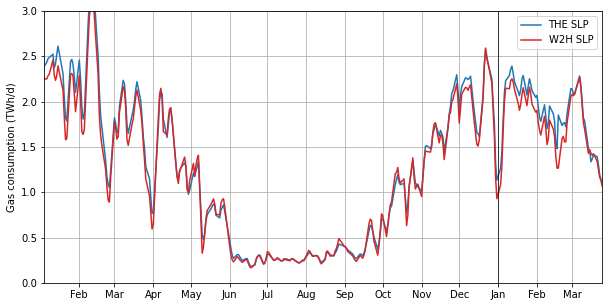

In [174]:
plt.figure(figsize=(10,5))
dft = df.dropna()
plt.plot(dft.index, dft['the_combined_slp'], label='THE SLP')
plt.plot(dft.index, dft['aggregated(no_dist_heat)'], color='tab:red', label='W2H SLP')
plt.xlim(dft.index[[0, -1]])

plt.ylim(0, 3)
plt.axvline('2022-01-01', color='black', linewidth=0.7)
plt.grid()
plt.legend(loc='upper right')
plt.ylabel('Gas consumption (TWh/d)')

X = plt.gca().xaxis
X.set_major_locator(mdates.MonthLocator())
X.set_major_formatter(mdates.DateFormatter('%b'))


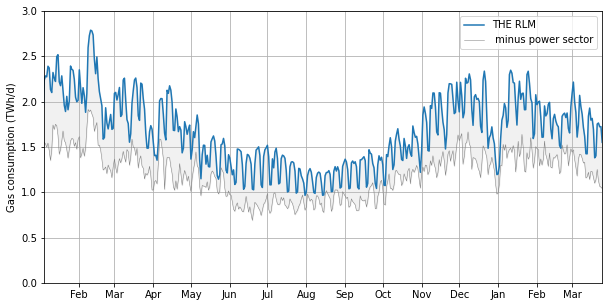

In [175]:
plt.figure(figsize=(10,5))

the_rlm = df['the_combined_rlm']
the_rlm.plot(label='THE RLM')

power_res = the_rlm - df['electricity_from_gas']
plt.plot(df.index, power_res, color='tab:grey', label=' minus power sector', linewidth=0.5)
plt.fill_between(df.index, the_rlm, power_res, color='tab:grey', alpha=0.1)

#plt.fill_between(df.index, power_res, 0, color='tab:blue', alpha=0.1)

plt.xlim(dft.index[[0, -1]])
plt.ylim(0, 3)
#plt.axvline('2022-01-01', color='black', linewidth=0.7)
plt.grid()
plt.legend(loc='upper right')
plt.ylabel('Gas consumption (TWh/d)')

X = plt.gca().xaxis
X.set_major_locator(mdates.MonthLocator())
X.set_major_formatter(mdates.DateFormatter('%b'))

# Estimations: X^= a + b*X

In [177]:
df_x = df

df_x = df_x.rename(columns = {
    "aggregated(no_dist_heat)" : "slp_w2h",
    "dist_heat": "slp_w2h_dh",
    "the_combined_slp" : "slp_the",
    "the_combined_rlm" : "rlm_the",
    "bdew [TWh]" : "bdew",
    "gas_price [$/lhs]" : "prices"
})

In [178]:
df_x["the_sum"] = df_x["rlm_the"] + df_x["slp_the"]

In [195]:
df_x_no_holiday = df_x[(df_x.holiday==0) & (df_x.christmas_period==0) & (df_x.bridgeday==0)]

## Fit model to 2021 and predict for 2022

In [196]:
df_x_no_holiday_2022 = df_x_no_holiday.loc[df_x_no_holiday.index.year == 2022]

In [197]:
df_x_no_holiday = df_x_no_holiday.loc[df_x_no_holiday.index.year == 2021]

In [198]:
df_x_no_holiday.columns

Index(['slp_w2h', 'slp_w2h_dh', 'aggregated(incl_small_chp)', 'slp_the',
       'rlm_the', 'bdew', 'electricity_from_gas', 'prices', 'index', 'time',
       'year', 'month', 'weekday', 'weekday_num', 'monday', 'friday',
       'weekend', 'christmas_period', 'holiday', 'bridgeday', 'the_sum'],
      dtype='object')

## bdew

In [219]:
model = IV2SLS.from_formula('bdew ~ 1 + slp_w2h + electricity_from_gas + C(weekday)', 
                            data=df_x_no_holiday)
results = model.fit() 
results

OLS Estimation Summary                            
==============================================================================
Dep. Variable:                   bdew   R-squared:                      0.9729
Estimator:                        OLS   Adj. R-squared:                 0.9723
No. Observations:                 333   F-statistic:                 1.003e+04
Date:                Thu, Apr 21 2022   P-value (F-stat)                0.0000
Time:                        10:23:27   Distribution:                  chi2(8)
Cov. Estimator:                robust                                         
                                                                              
                                    Parameter Estimates                                    
===========================================================================================
                         Parameter  Std. Err.     T-stat    P-value    Lower CI    Upper CI
-------------------------------------------------------------------------------------------
Intercept                   0.8568     0.0411     20.846     0.0000      0.7763      0.9374
C(weekday)[T.Monday]        0.0178     0.0388     0.4586     0.6465     -0.0583      0.0939
C(weekday)[T.Saturday]     -0.1427     0.0383    -3.7270     0.0002     -0.2178     -0.0677
C(weekday)[T.Sunday]       -0.1218     0.0420    -2.9021     0.0037     -0.2040     -0.0395
C(weekday)[T.Thursday]      0.0520     0.0394     1.3208     0.1866     -0.0252      0.1292
C(weekday)[T.Tuesday]       0.0464     0.0390     1.1891     0.2344     -0.0301      0.1228
C(weekday)[T.Wednesday]     0.0434     0.0442     0.9832     0.3255     -0.0431      0.1300
electricity_from_gas        0.6854     0.0852     8.0414     0.0000      0.5184      0.8525
slp_w2h                     1.3877     0.0209     66.284     0.0000      1.3466      1.4287
===========================================================================================
OLSResults, id: 0x7fc4f9cdb460

In [218]:
model = IV2SLS.from_formula('bdew ~ 1 + slp_w2h + electricity_from_gas + electricity_from_gas**2 + C(weekday)', 
                            data=df_x_no_holiday)
results = model.fit() 
results

OLS Estimation Summary                            
==============================================================================
Dep. Variable:                   bdew   R-squared:                      0.9729
Estimator:                        OLS   Adj. R-squared:                 0.9723
No. Observations:                 333   F-statistic:                 1.003e+04
Date:                Thu, Apr 21 2022   P-value (F-stat)                0.0000
Time:                        10:23:22   Distribution:                  chi2(8)
Cov. Estimator:                robust                                         
                                                                              
                                    Parameter Estimates                                    
===========================================================================================
                         Parameter  Std. Err.     T-stat    P-value    Lower CI    Upper CI
-------------------------------------------------------------------------------------------
Intercept                   0.8568     0.0411     20.846     0.0000      0.7763      0.9374
C(weekday)[T.Monday]        0.0178     0.0388     0.4586     0.6465     -0.0583      0.0939
C(weekday)[T.Saturday]     -0.1427     0.0383    -3.7270     0.0002     -0.2178     -0.0677
C(weekday)[T.Sunday]       -0.1218     0.0420    -2.9021     0.0037     -0.2040     -0.0395
C(weekday)[T.Thursday]      0.0520     0.0394     1.3208     0.1866     -0.0252      0.1292
C(weekday)[T.Tuesday]       0.0464     0.0390     1.1891     0.2344     -0.0301      0.1228
C(weekday)[T.Wednesday]     0.0434     0.0442     0.9832     0.3255     -0.0431      0.1300
electricity_from_gas        0.6854     0.0852     8.0414     0.0000      0.5184      0.8525
slp_w2h                     1.3877     0.0209     66.284     0.0000      1.3466      1.4287
===========================================================================================
OLSResults, id: 0x7fc4fbdea340

In [260]:
model_22 = IV2SLS.from_formula('bdew ~ 1 + slp_w2h + electricity_from_gas + electricity_from_gas**2 + C(weekday)', 
                            data=df_x_no_holiday_2022)
#results_22 = model.fit() 
#results

In [262]:
model_22.exog.pandas

,Intercept,C(weekday)[T.Monday],C(weekday)[T.Saturday],C(weekday)[T.Sunday],C(weekday)[T.Thursday],C(weekday)[T.Tuesday],C(weekday)[T.Wednesday],electricity_from_gas,slp_w2h
2022-01-02,1.0,0,0,1,0,0,0,0.203659,0.978711
2022-01-03,1.0,1,0,0,0,0,0,0.296377,1.084549
2022-01-04,1.0,0,0,0,0,1,0,0.501326,1.288476
2022-01-05,1.0,0,0,0,0,0,1,0.319457,1.690666
2022-01-07,1.0,0,0,0,0,0,0,0.405960,2.147899
...,...,...,...,...,...,...,...,...,...
2022-03-21,1.0,1,0,0,0,0,0,0.501134,1.340926
2022-03-22,1.0,0,0,0,0,1,0,0.635613,1.248650
2022-03-23,1.0,0,0,0,0,0,1,0.656999,1.164591
2022-03-24,1.0,0,0,0,1,0,0,0.667661,1.132335


In [264]:
model.predict(exog=model_22.exog , params = results.params) 

TypeError: predict() missing 1 required positional argument: 'params'

In [ ]:
results.predict(df_x_no_holiday)

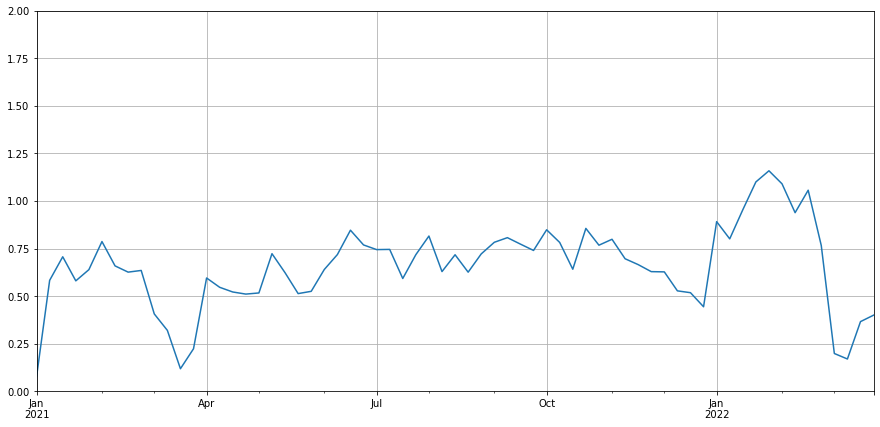

In [191]:
(df_x['bdew'] - df_x['electricity_from_gas'] - 1.44 * df_x['slp_w2h']).resample('1w').mean(
).plot(figsize=(15,7), ylim=(0,2))
plt.grid()

## THE_RLM

In [220]:
model = IV2SLS.from_formula('rlm_the ~ 1 + slp_w2h + electricity_from_gas + C(weekday)', 
                            data=df_x_no_holiday)
results = model.fit() 
results

OLS Estimation Summary                            
==============================================================================
Dep. Variable:                rlm_the   R-squared:                      0.9790
Estimator:                        OLS   Adj. R-squared:                 0.9785
No. Observations:                 333   F-statistic:                 1.616e+04
Date:                Thu, Apr 21 2022   P-value (F-stat)                0.0000
Time:                        10:23:38   Distribution:                  chi2(8)
Cov. Estimator:                robust                                         
                                                                              
                                    Parameter Estimates                                    
===========================================================================================
                         Parameter  Std. Err.     T-stat    P-value    Lower CI    Upper CI
-------------------------------------------------------------------------------------------
Intercept                   0.9228     0.0107     86.643     0.0000      0.9020      0.9437
C(weekday)[T.Monday]        0.0517     0.0107     4.8409     0.0000      0.0307      0.0726
C(weekday)[T.Saturday]     -0.1544     0.0113    -13.676     0.0000     -0.1766     -0.1323
C(weekday)[T.Sunday]       -0.1253     0.0120    -10.447     0.0000     -0.1488     -0.1018
C(weekday)[T.Thursday]      0.0451     0.0149     3.0285     0.0025      0.0159      0.0743
C(weekday)[T.Tuesday]       0.0499     0.0102     4.8756     0.0000      0.0298      0.0699
C(weekday)[T.Wednesday]     0.0520     0.0122     4.2725     0.0000      0.0282      0.0759
electricity_from_gas        0.6192     0.0301     20.559     0.0000      0.5602      0.6782
slp_w2h                     0.3877     0.0084     46.262     0.0000      0.3712      0.4041
===========================================================================================
OLSResults, id: 0x7fc4fbfcb3d0

In [216]:
model = IV2SLS.from_formula('rlm_the ~ 1 + slp_w2h + electricity_from_gas + electricity_from_gas**2 + C(weekday)', 
                            data=df_x_no_holiday)
results = model.fit() 
results

OLS Estimation Summary                            
==============================================================================
Dep. Variable:                rlm_the   R-squared:                      0.9790
Estimator:                        OLS   Adj. R-squared:                 0.9785
No. Observations:                 333   F-statistic:                 1.616e+04
Date:                Thu, Apr 21 2022   P-value (F-stat)                0.0000
Time:                        10:22:44   Distribution:                  chi2(8)
Cov. Estimator:                robust                                         
                                                                              
                                    Parameter Estimates                                    
===========================================================================================
                         Parameter  Std. Err.     T-stat    P-value    Lower CI    Upper CI
-------------------------------------------------------------------------------------------
Intercept                   0.9228     0.0107     86.643     0.0000      0.9020      0.9437
C(weekday)[T.Monday]        0.0517     0.0107     4.8409     0.0000      0.0307      0.0726
C(weekday)[T.Saturday]     -0.1544     0.0113    -13.676     0.0000     -0.1766     -0.1323
C(weekday)[T.Sunday]       -0.1253     0.0120    -10.447     0.0000     -0.1488     -0.1018
C(weekday)[T.Thursday]      0.0451     0.0149     3.0285     0.0025      0.0159      0.0743
C(weekday)[T.Tuesday]       0.0499     0.0102     4.8756     0.0000      0.0298      0.0699
C(weekday)[T.Wednesday]     0.0520     0.0122     4.2725     0.0000      0.0282      0.0759
electricity_from_gas        0.6192     0.0301     20.559     0.0000      0.5602      0.6782
slp_w2h                     0.3877     0.0084     46.262     0.0000      0.3712      0.4041
===========================================================================================
OLSResults, id: 0x7fc4fc200280

In [93]:
(df_x['rlm_the'] - 0.82 * df_x['power'] - 0.32 * df_x['slp_w2h']).resample('1w').mean().dropna().plot(figsize=(10,5), ylim=(0,2))
plt.ylim(0,1.6)
plt.ylabel('Gas consumption (TWh/d)')
plt.grid()

In [99]:
d_R2 = {
    "bdew_res": {
        "weekday": 0.9641,
        "weekend": 0.9644},
    "bdew": {
        "power & weekday": 0.9731,
        "power & weekend": 0.9733},
    "the_rlm_res":{
        "power & weekday" : 0.9166, 
        "power & weekend" : 0.9114},
    "the_rlm":{
        "power & weekday" : 0.9729, 
        "power & weekend" : 0.9793}
       }

In [ ]:
# e_bdew_weekend_2021

In [ ]:
- plot estimate_bdew_2021 vs bdew_2021
- model.predict(df_x_no_hholiday(2021 & 2022))
- Power ^2 zusätzlich (in den DF oder in Formel)


In [ ]:
pd.concat(
    [results.params, results.std_errors], axis=1
)#.to_csv('results.csv')

In [89]:
def extract(x):
    #x1 = x.first_stage.diagnostics
    return {
        'estimate': x.params['price'],
        'errors': x.std_errors['price']#,
        #'prsq': x1['partial.rsquared']['price'],
        #'fstat': x1['f.stat']['price']
    }